# 上证指数涨跌预测

Install required moduels      

    pip install numpy
    pip install scipy
    pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
from sklearn import cross_validation

c:\users\hcche\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import peforth
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [12]:
data = pd.read_csv('000777.csv',encoding='gbk',parse_dates=[0],index_col=0)

In [1]:
# data frame 中帶有 None 的 rows 都剔除掉。 本來有 4752 rows 現在只剩 4639 
# 以下很多筆記是根據舊總數寫的，我看除非必要，這一動還是別做，以保持原筆記的易讀。

# df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
data = data.replace(to_replace='None', value=np.nan).dropna()  


NameError: name 'data' is not defined

In [10]:
# pdb.set_trace() # data 本來是新的在上面
data.sort_index(0,ascending=True,inplace=True) # 排序 sort 過後變成最舊的在上面

In [14]:
data.index

DatetimeIndex(['2017-01-20', '2017-01-19', '2017-01-18', '2017-01-17',
               '2017-01-16', '2017-01-13', '2017-01-12', '2017-01-11',
               '2017-01-10', '2017-01-09',
               ...
               '1997-07-23', '1997-07-22', '1997-07-21', '1997-07-18',
               '1997-07-17', '1997-07-16', '1997-07-15', '1997-07-14',
               '1997-07-11', '1997-07-10'],
              dtype='datetime64[ns]', name='日期', length=4639, freq=None)

In [ ]:
data.query('index < "1997-06-20"')

In [ ]:
# raw data has 20 years long, but here only analysis the last 150 days of a chosen day
dayfeature=150
featurenum=5*dayfeature  # 取五個有關係的欄位，特徵值。
x=np.zeros((data.shape[0]-dayfeature,featurenum+1))
y=np.zeros((data.shape[0]-dayfeature));

In [ ]:
peforth.push(data).dictate('constant data');
peforth.push(dayfeature).dictate('constant dayfeature');
peforth.push(x).dictate('value x');
peforth.push(y).dictate('value y');

In [ ]:
%f data :> shape . cr
%f data :> shape[0] . cr
%f data :> shape[0]-v('dayfeature') . cr
peforth.ok();

In [ ]:
# 重疊 shift 150 天的五個「行情數目」加上下一天的開盤 共 751 個「數目」當作 feature X 

for i in range(0,data.shape[0]-dayfeature):
    x[i,0:featurenum]=np.array(data[i:i+dayfeature] \
          [[u'收盘价',u'最高价',u'最低价',u'开盘价',u'成交量']]).reshape((1,featurenum))
    # x[i,featurenum]=data.ix[i+dayfeature][u'开盘价']  # ix deprecated
    x[i,featurenum]=data.iloc[i+dayfeature][u'开盘价']

# 這裡設定要問 AI 的題目

In [ ]:
# 預測當天是否會「漲」

# data.shape[0]-dayfeature 是 4602 同上 x, 所以這是在製作相對所有 x 的 y. x 是 (4602, 751)
# dayfeature 是 150 
# 他用下一天，第 151 天，的「開盤」vs 當天的「收盤」來當作這天是否有漲。這點怪怪的，應該用「第 151 天」
# 的「收盤」來跟「第 150 天」的「收盤」比較才對。

for i in range(0,data.shape[0]-dayfeature):
    if data.iloc[i+dayfeature][u'收盘价']>=data.iloc[i+dayfeature][u'开盘价']:
        y[i]=1
    else:
        y[i]=0          

In [ ]:
# 預測當天是否會「漲停」

# data.shape[0]-dayfeature 是 4602 同上 x, 所以這是在製作相對所有 x 的 y. x 是 (4602, 751)
# dayfeature 是 150 
# 他用下一天，第 151 天，的「開盤」vs 當天的「收盤」來當作這天是否有漲。這點怪怪的，應該用「第 151 天」
# 的「收盤」來跟「第 150 天」的「收盤」比較才對。

for i in range(0,data.shape[0]-dayfeature):
    c1 = data.iloc[i+dayfeature][u'最高价']  # 當天最高價
    c2 = data.iloc[i+dayfeature-1][u'收盘价']  # 前一天的收盤價  
    # or should we use 涨跌幅 directly?
    if (c1-c2)/c2 >= 0.96:
        y[i]=1
    else:
        y[i]=0          

# 這裡選用 classifier 

In [ ]:
# SVM
from sklearn import svm
clf=svm.SVC(kernel='poly')  # so what is SVM? See "11-提交-监督学习 - 课程导学.pdf"
result = []

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
result = []

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
result = []

In [ ]:
# Bayes
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
result = []

# 訓練

In [ ]:
for i in range(100):
    x_train, x_test, y_train, y_test = \
                cross_validation.train_test_split(x, y, test_size = 0.2)
    clf.fit(x_train, y_train)
    result.append(np.mean(y_test == clf.predict(x_test)))

In [ ]:
print("svm classifier accuacy:")
print(result)

### 用 Bayes 跑 1000 次來看，從頭到尾都是隨機的。

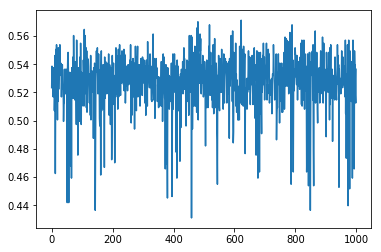

In [2]:
# Bayes classifier accuacy:
Bayes1k = [0.5233441910966341, 0.5385450597176982, 0.5255157437567861, 0.5276872964169381, 0.5222584147665581, 0.5168295331161781, 0.5374592833876222, 0.5200868621064061, 0.5298588490770901, 0.507057546145494, 0.5168295331161781, 0.5461454940282302, 0.46254071661237783, 0.5211726384364821, 0.5504885993485342, 0.5168295331161781, 0.5537459283387622, 0.5396308360477742, 0.5255157437567861, 0.500542888165038, 0.5385450597176982, 0.5135722041259501, 0.5515743756786102, 0.5222584147665581, 0.5320304017372421, 0.5352877307274702, 0.5374592833876222, 0.5537459283387622, 0.5331161780673181, 0.5320304017372421, 0.5407166123778502, 0.5396308360477742, 0.5168295331161781, 0.5266015200868621, 0.5320304017372421, 0.5396308360477742, 0.5287730727470141, 0.5222584147665581, 0.5222584147665581, 0.499457111834962, 0.511400651465798, 0.512486427795874, 0.5363735070575462, 0.5233441910966341, 0.5211726384364821, 0.5190010857763301, 0.5363735070575462, 0.5255157437567861, 0.5363735070575462, 0.5276872964169381, 0.5211726384364821, 0.44191096634093374, 0.5352877307274702, 0.5461454940282302, 0.5483170466883822, 0.5320304017372421, 0.44191096634093374, 0.5331161780673181, 0.5342019543973942, 0.5266015200868621, 0.5222584147665581, 0.5211726384364821, 0.46796959826275786, 0.511400651465798, 0.5342019543973942, 0.4592833876221498, 0.5374592833876222, 0.5157437567861021, 0.5342019543973942, 0.5309446254071661, 0.5450597176981542, 0.5157437567861021, 0.5602605863192183, 0.5396308360477742, 0.5309446254071661, 0.5342019543973942, 0.5146579804560261, 0.5418023887079262, 0.5157437567861021, 0.5168295331161781, 0.5190010857763301, 0.49728555917481, 0.5570032573289903, 0.5255157437567861, 0.505971769815418, 0.5342019543973942, 0.4755700325732899, 0.5320304017372421, 0.5374592833876222, 0.5320304017372421, 0.5298588490770901, 0.501628664495114, 0.499457111834962, 0.5450597176981542, 0.5157437567861021, 0.5548317046688382, 0.5266015200868621, 0.49728555917481, 0.5342019543973942, 0.510314875135722, 0.5276872964169381, 0.5222584147665581, 0.5146579804560261, 0.5255157437567861, 0.5428881650380022, 0.5352877307274702, 0.510314875135722, 0.5646036916395223, 0.5211726384364821, 0.5190010857763301, 0.5602605863192183, 0.5407166123778502, 0.5255157437567861, 0.5515743756786102, 0.509229098805646, 0.5494028230184582, 0.505971769815418, 0.5233441910966341, 0.5439739413680782, 0.5342019543973942, 0.5428881650380022, 0.5385450597176982, 0.5276872964169381, 0.5211726384364821, 0.512486427795874, 0.5331161780673181, 0.5222584147665581, 0.503800217155266, 0.5461454940282302, 0.500542888165038, 0.5352877307274702, 0.5331161780673181, 0.5331161780673181, 0.5200868621064061, 0.5298588490770901, 0.5200868621064061, 0.5352877307274702, 0.48751357220412594, 0.5374592833876222, 0.5342019543973942, 0.496199782844734, 0.5407166123778502, 0.5211726384364821, 0.4364820846905538, 0.49185667752442996, 0.5276872964169381, 0.5363735070575462, 0.5494028230184582, 0.5342019543973942, 0.5439739413680782, 0.5515743756786102, 0.5352877307274702, 0.5190010857763301, 0.5200868621064061, 0.5472312703583062, 0.5233441910966341, 0.5331161780673181, 0.501628664495114, 0.496199782844734, 0.512486427795874, 0.5363735070575462, 0.46145494028230183, 0.5352877307274702, 0.5494028230184582, 0.507057546145494, 0.5320304017372421, 0.5222584147665581, 0.5255157437567861, 0.5255157437567861, 0.5396308360477742, 0.50814332247557, 0.5298588490770901, 0.5266015200868621, 0.46688382193268185, 0.5450597176981542, 0.5157437567861021, 0.5179153094462541, 0.5418023887079262, 0.5374592833876222, 0.5374592833876222, 0.5385450597176982, 0.5190010857763301, 0.5407166123778502, 0.5200868621064061, 0.5287730727470141, 0.5363735070575462, 0.5233441910966341, 0.5472312703583062, 0.5244299674267101, 0.503800217155266, 0.5396308360477742, 0.5385450597176982, 0.5211726384364821, 0.49728555917481, 0.5233441910966341, 0.5244299674267101, 0.5374592833876222, 0.4723127035830619, 0.499457111834962, 0.5461454940282302, 0.5244299674267101, 0.511400651465798, 0.5320304017372421, 0.5407166123778502, 0.5157437567861021, 0.5244299674267101, 0.5266015200868621, 0.47014115092290987, 0.5320304017372421, 0.5276872964169381, 0.5168295331161781, 0.5515743756786102, 0.5298588490770901, 0.5461454940282302, 0.5266015200868621, 0.5190010857763301, 0.5320304017372421, 0.50814332247557, 0.5157437567861021, 0.5504885993485342, 0.5168295331161781, 0.5385450597176982, 0.5418023887079262, 0.5537459283387622, 0.5287730727470141, 0.5331161780673181, 0.5179153094462541, 0.5461454940282302, 0.5320304017372421, 0.5352877307274702, 0.5266015200868621, 0.5494028230184582, 0.5352877307274702, 0.5363735070575462, 0.5309446254071661, 0.5298588490770901, 0.5255157437567861, 0.5504885993485342, 0.5211726384364821, 0.5472312703583062, 0.5276872964169381, 0.5461454940282302, 0.512486427795874, 0.5276872964169381, 0.5374592833876222, 0.5244299674267101, 0.5385450597176982, 0.5309446254071661, 0.5298588490770901, 0.5211726384364821, 0.5298588490770901, 0.5396308360477742, 0.5320304017372421, 0.5255157437567861, 0.5320304017372421, 0.5298588490770901, 0.5309446254071661, 0.5428881650380022, 0.5266015200868621, 0.5537459283387622, 0.5157437567861021, 0.498371335504886, 0.5418023887079262, 0.503800217155266, 0.5309446254071661, 0.5168295331161781, 0.5352877307274702, 0.5439739413680782, 0.5168295331161781, 0.5266015200868621, 0.5374592833876222, 0.5407166123778502, 0.494028230184582, 0.5320304017372421, 0.5135722041259501, 0.5526601520086862, 0.5298588490770901, 0.5287730727470141, 0.507057546145494, 0.5352877307274702, 0.5450597176981542, 0.5428881650380022, 0.5526601520086862, 0.5168295331161781, 0.5363735070575462, 0.5211726384364821, 0.5233441910966341, 0.5396308360477742, 0.5309446254071661, 0.5374592833876222, 0.510314875135722, 0.5298588490770901, 0.5233441910966341, 0.5439739413680782, 0.5407166123778502, 0.5287730727470141, 0.5255157437567861, 0.5179153094462541, 0.5450597176981542, 0.5439739413680782, 0.5266015200868621, 0.5363735070575462, 0.5331161780673181, 0.5428881650380022, 0.5331161780673181, 0.5190010857763301, 0.512486427795874, 0.5287730727470141, 0.5385450597176982, 0.503800217155266, 0.5407166123778502, 0.5428881650380022, 0.5352877307274702, 0.5407166123778502, 0.510314875135722, 0.5559174809989142, 0.5320304017372421, 0.5309446254071661, 0.5385450597176982, 0.5309446254071661, 0.5266015200868621, 0.5233441910966341, 0.5450597176981542, 0.5472312703583062, 0.5255157437567861, 0.5233441910966341, 0.5385450597176982, 0.5146579804560261, 0.5146579804560261, 0.5135722041259501, 0.5244299674267101, 0.5331161780673181, 0.5559174809989142, 0.5613463626492943, 0.5266015200868621, 0.5146579804560261, 0.5266015200868621, 0.5439739413680782, 0.5385450597176982, 0.501628664495114, 0.5331161780673181, 0.5309446254071661, 0.5298588490770901, 0.5439739413680782, 0.5320304017372421, 0.5374592833876222, 0.5309446254071661, 0.5135722041259501, 0.5255157437567861, 0.5157437567861021, 0.5309446254071661, 0.509229098805646, 0.5309446254071661, 0.5255157437567861, 0.5233441910966341, 0.510314875135722, 0.5287730727470141, 0.5298588490770901, 0.5287730727470141, 0.5298588490770901, 0.5418023887079262, 0.510314875135722, 0.5342019543973942, 0.5309446254071661, 0.499457111834962, 0.5266015200868621, 0.5472312703583062, 0.5222584147665581, 0.5407166123778502, 0.5450597176981542, 0.5200868621064061, 0.5157437567861021, 0.5244299674267101, 0.46579804560260585, 0.5363735070575462, 0.5396308360477742, 0.5233441910966341, 0.46905537459283386, 0.5211726384364821, 0.4809989142236699, 0.44516829533116176, 0.5374592833876222, 0.5266015200868621, 0.5222584147665581, 0.5309446254071661, 0.5320304017372421, 0.50814332247557, 0.5168295331161781, 0.5287730727470141, 0.5309446254071661, 0.5135722041259501, 0.5211726384364821, 0.5266015200868621, 0.5407166123778502, 0.5179153094462541, 0.44625407166123776, 0.501628664495114, 0.5255157437567861, 0.5472312703583062, 0.50814332247557, 0.5439739413680782, 0.5352877307274702, 0.5374592833876222, 0.5472312703583062, 0.5385450597176982, 0.5200868621064061, 0.5385450597176982, 0.5211726384364821, 0.4777415852334419, 0.5211726384364821, 0.5255157437567861, 0.4592833876221498, 0.5428881650380022, 0.5342019543973942, 0.507057546145494, 0.5385450597176982, 0.507057546145494, 0.5157437567861021, 0.5309446254071661, 0.5298588490770901, 0.5266015200868621, 0.47122692725298587, 0.49185667752442996, 0.5331161780673181, 0.495114006514658, 0.5331161780673181, 0.5363735070575462, 0.5331161780673181, 0.5331161780673181, 0.5200868621064061, 0.5418023887079262, 0.5190010857763301, 0.5287730727470141, 0.5396308360477742, 0.5515743756786102, 0.5320304017372421, 0.5439739413680782, 0.5222584147665581, 0.5320304017372421, 0.5287730727470141, 0.5179153094462541, 0.496199782844734, 0.5363735070575462, 0.5266015200868621, 0.5428881650380022, 0.5135722041259501, 0.5266015200868621, 0.5342019543973942, 0.5418023887079262, 0.5244299674267101, 0.503800217155266, 0.5287730727470141, 0.5602605863192183, 0.5298588490770901, 0.5418023887079262, 0.5407166123778502, 0.5200868621064061, 0.5255157437567861, 0.5602605863192183, 0.43105320304017375, 0.5439739413680782, 0.5591748099891423, 0.494028230184582, 0.5233441910966341, 0.5483170466883822, 0.5298588490770901, 0.5255157437567861, 0.510314875135722, 0.5266015200868621, 0.5200868621064061, 0.5526601520086862, 0.5320304017372421, 0.510314875135722, 0.5439739413680782, 0.5418023887079262, 0.5255157437567861, 0.505971769815418, 0.5656894679695983, 0.5407166123778502, 0.509229098805646, 0.5700325732899023, 0.500542888165038, 0.5472312703583062, 0.5266015200868621, 0.5439739413680782, 0.5320304017372421, 0.5266015200868621, 0.5613463626492943, 0.5494028230184582, 0.5580890336590663, 0.5320304017372421, 0.5190010857763301, 0.5396308360477742, 0.5266015200868621, 0.5352877307274702, 0.5320304017372421, 0.5461454940282302, 0.5266015200868621, 0.5168295331161781, 0.5190010857763301, 0.5276872964169381, 0.5287730727470141, 0.5418023887079262, 0.5352877307274702, 0.5179153094462541, 0.4820846905537459, 0.5309446254071661, 0.5352877307274702, 0.509229098805646, 0.5428881650380022, 0.5331161780673181, 0.5222584147665581, 0.5190010857763301, 0.509229098805646, 0.510314875135722, 0.5396308360477742, 0.5526601520086862, 0.5342019543973942, 0.5678610206297503, 0.5255157437567861, 0.5179153094462541, 0.5320304017372421, 0.5483170466883822, 0.5222584147665581, 0.5385450597176982, 0.5385450597176982, 0.5146579804560261, 0.5363735070575462, 0.509229098805646, 0.5363735070575462, 0.5537459283387622, 0.5233441910966341, 0.504885993485342, 0.5472312703583062, 0.5320304017372421, 0.5580890336590663, 0.509229098805646, 0.509229098805646, 0.5222584147665581, 0.5309446254071661, 0.5407166123778502, 0.5342019543973942, 0.496199782844734, 0.48642779587404994, 0.4549402823018458, 0.5320304017372421, 0.5266015200868621, 0.5244299674267101, 0.5461454940282302, 0.5374592833876222, 0.510314875135722, 0.507057546145494, 0.5418023887079262, 0.5439739413680782, 0.5287730727470141, 0.5255157437567861, 0.5200868621064061, 0.5233441910966341, 0.5504885993485342, 0.5200868621064061, 0.5287730727470141, 0.5255157437567861, 0.5374592833876222, 0.50814332247557, 0.5363735070575462, 0.5472312703583062, 0.5168295331161781, 0.512486427795874, 0.5309446254071661, 0.5363735070575462, 0.5439739413680782, 0.5352877307274702, 0.5418023887079262, 0.5385450597176982, 0.5287730727470141, 0.512486427795874, 0.5244299674267101, 0.5276872964169381, 0.5407166123778502, 0.5190010857763301, 0.5309446254071661, 0.5266015200868621, 0.5418023887079262, 0.48751357220412594, 0.5439739413680782, 0.5244299674267101, 0.5266015200868621, 0.5331161780673181, 0.5580890336590663, 0.5602605863192183, 0.5559174809989142, 0.5342019543973942, 0.5439739413680782, 0.5135722041259501, 0.5635179153094463, 0.509229098805646, 0.48425624321389793, 0.49185667752442996, 0.5483170466883822, 0.5255157437567861, 0.5461454940282302, 0.5211726384364821, 0.5287730727470141, 0.5255157437567861, 0.5548317046688382, 0.510314875135722, 0.5331161780673181, 0.505971769815418, 0.505971769815418, 0.5287730727470141, 0.5168295331161781, 0.500542888165038, 0.5179153094462541, 0.500542888165038, 0.509229098805646, 0.5244299674267101, 0.500542888165038, 0.5526601520086862, 0.5255157437567861, 0.512486427795874, 0.5146579804560261, 0.5439739413680782, 0.5711183496199783, 0.5309446254071661, 0.511400651465798, 0.5200868621064061, 0.5211726384364821, 0.5504885993485342, 0.5494028230184582, 0.510314875135722, 0.5526601520086862, 0.5320304017372421, 0.5233441910966341, 0.5439739413680782, 0.5472312703583062, 0.4766558089033659, 0.5233441910966341, 0.5190010857763301, 0.5200868621064061, 0.5168295331161781, 0.5298588490770901, 0.50814332247557, 0.5298588490770901, 0.5200868621064061, 0.5222584147665581, 0.5342019543973942, 0.5494028230184582, 0.5352877307274702, 0.5374592833876222, 0.5222584147665581, 0.5450597176981542, 0.5439739413680782, 0.511400651465798, 0.5320304017372421, 0.5352877307274702, 0.5309446254071661, 0.5255157437567861, 0.5342019543973942, 0.5461454940282302, 0.5255157437567861, 0.5179153094462541, 0.511400651465798, 0.5363735070575462, 0.5222584147665581, 0.5483170466883822, 0.5515743756786102, 0.5287730727470141, 0.5396308360477742, 0.501628664495114, 0.5222584147665581, 0.511400651465798, 0.4755700325732899, 0.5190010857763301, 0.5494028230184582, 0.5494028230184582, 0.5385450597176982, 0.5276872964169381, 0.4592833876221498, 0.5309446254071661, 0.5483170466883822, 0.5233441910966341, 0.5298588490770901, 0.46362649294245384, 0.5461454940282302, 0.5331161780673181, 0.5483170466883822, 0.504885993485342, 0.5439739413680782, 0.50814332247557, 0.49077090119435396, 0.5407166123778502, 0.5200868621064061, 0.5244299674267101, 0.5461454940282302, 0.5255157437567861, 0.5548317046688382, 0.5287730727470141, 0.5255157437567861, 0.5450597176981542, 0.5146579804560261, 0.5287730727470141, 0.5320304017372421, 0.5342019543973942, 0.5396308360477742, 0.5407166123778502, 0.5548317046688382, 0.5287730727470141, 0.5146579804560261, 0.5255157437567861, 0.5190010857763301, 0.5407166123778502, 0.5504885993485342, 0.5428881650380022, 0.5320304017372421, 0.5472312703583062, 0.512486427795874, 0.5276872964169381, 0.5287730727470141, 0.5266015200868621, 0.5200868621064061, 0.5276872964169381, 0.5179153094462541, 0.5298588490770901, 0.504885993485342, 0.5255157437567861, 0.5331161780673181, 0.5331161780673181, 0.5320304017372421, 0.5537459283387622, 0.5428881650380022, 0.5331161780673181, 0.5233441910966341, 0.5146579804560261, 0.5276872964169381, 0.5179153094462541, 0.5244299674267101, 0.5266015200868621, 0.5472312703583062, 0.48642779587404994, 0.504885993485342, 0.511400651465798, 0.509229098805646, 0.5331161780673181, 0.5352877307274702, 0.5472312703583062, 0.5309446254071661, 0.5255157437567861, 0.5374592833876222, 0.498371335504886, 0.5407166123778502, 0.5331161780673181, 0.5233441910966341, 0.5157437567861021, 0.5135722041259501, 0.5222584147665581, 0.5407166123778502, 0.505971769815418, 0.5266015200868621, 0.505971769815418, 0.5374592833876222, 0.5352877307274702, 0.5179153094462541, 0.5309446254071661, 0.5483170466883822, 0.50814332247557, 0.5244299674267101, 0.5591748099891423, 0.5418023887079262, 0.5244299674267101, 0.5385450597176982, 0.5580890336590663, 0.5428881650380022, 0.5570032573289903, 0.5244299674267101, 0.5385450597176982, 0.5385450597176982, 0.5559174809989142, 0.5407166123778502, 0.5190010857763301, 0.5211726384364821, 0.5320304017372421, 0.5494028230184582, 0.5624321389793703, 0.5363735070575462, 0.5461454940282302, 0.5200868621064061, 0.4549402823018458, 0.5168295331161781, 0.5309446254071661, 0.5678610206297503, 0.505971769815418, 0.5233441910966341, 0.5428881650380022, 0.46362649294245384, 0.5222584147665581, 0.5352877307274702, 0.5211726384364821, 0.5363735070575462, 0.5309446254071661, 0.5515743756786102, 0.5472312703583062, 0.5461454940282302, 0.5320304017372421, 0.5298588490770901, 0.5255157437567861, 0.5461454940282302, 0.5331161780673181, 0.5146579804560261, 0.5342019543973942, 0.5342019543973942, 0.5418023887079262, 0.5244299674267101, 0.5320304017372421, 0.5309446254071661, 0.5222584147665581, 0.5439739413680782, 0.5450597176981542, 0.5233441910966341, 0.5548317046688382, 0.5320304017372421, 0.511400651465798, 0.5570032573289903, 0.510314875135722, 0.5298588490770901, 0.5352877307274702, 0.5363735070575462, 0.5450597176981542, 0.5146579804560261, 0.5570032573289903, 0.5374592833876222, 0.50814332247557, 0.5439739413680782, 0.5472312703583062, 0.5211726384364821, 0.5320304017372421, 0.5385450597176982, 0.5287730727470141, 0.46362649294245384, 0.4788273615635179, 0.5233441910966341, 0.5472312703583062, 0.511400651465798, 0.5407166123778502, 0.4538545059717698, 0.5363735070575462, 0.5266015200868621, 0.5483170466883822, 0.5342019543973942, 0.5320304017372421, 0.4364820846905538, 0.501628664495114, 0.5418023887079262, 0.5320304017372421, 0.5483170466883822, 0.5396308360477742, 0.5385450597176982, 0.5494028230184582, 0.5146579804560261, 0.5537459283387622, 0.4788273615635179, 0.4538545059717698, 0.5298588490770901, 0.5363735070575462, 0.5222584147665581, 0.5266015200868621, 0.5635179153094463, 0.512486427795874, 0.5211726384364821, 0.5396308360477742, 0.5342019543973942, 0.5483170466883822, 0.5342019543973942, 0.50814332247557, 0.498371335504886, 0.5352877307274702, 0.5255157437567861, 0.5200868621064061, 0.5352877307274702, 0.5374592833876222, 0.5320304017372421, 0.512486427795874, 0.5255157437567861, 0.5428881650380022, 0.5494028230184582, 0.5352877307274702, 0.5320304017372421, 0.5374592833876222, 0.5255157437567861, 0.5190010857763301, 0.5591748099891423, 0.5342019543973942, 0.512486427795874, 0.5385450597176982, 0.5548317046688382, 0.5352877307274702, 0.5211726384364821, 0.5342019543973942, 0.5363735070575462, 0.5287730727470141, 0.5331161780673181, 0.49728555917481, 0.48859934853420195, 0.5483170466883822, 0.5363735070575462, 0.5352877307274702, 0.5331161780673181, 0.5363735070575462, 0.5200868621064061, 0.5200868621064061, 0.5483170466883822, 0.5309446254071661, 0.5331161780673181, 0.500542888165038, 0.5515743756786102, 0.511400651465798, 0.5298588490770901, 0.5537459283387622, 0.5157437567861021, 0.5352877307274702, 0.5320304017372421, 0.5352877307274702, 0.5363735070575462, 0.48534201954397393, 0.5298588490770901, 0.5320304017372421, 0.5255157437567861, 0.5157437567861021, 0.5266015200868621, 0.5287730727470141, 0.5146579804560261, 0.5450597176981542, 0.5374592833876222, 0.5309446254071661, 0.5222584147665581, 0.5179153094462541, 0.5146579804560261, 0.5255157437567861, 0.5331161780673181, 0.5537459283387622, 0.5374592833876222, 0.5461454940282302, 0.5255157437567861, 0.5396308360477742, 0.4527687296416938, 0.5363735070575462, 0.5266015200868621, 0.5222584147665581, 0.5244299674267101, 0.5298588490770901, 0.5190010857763301, 0.5266015200868621, 0.5309446254071661, 0.5494028230184582, 0.5266015200868621, 0.5233441910966341, 0.5276872964169381, 0.5450597176981542, 0.5266015200868621, 0.5363735070575462, 0.5255157437567861, 0.5342019543973942, 0.5233441910966341, 0.5385450597176982, 0.5168295331161781, 0.5570032573289903, 0.504885993485342, 0.5331161780673181, 0.4733984799131379, 0.5222584147665581, 0.505971769815418, 0.5428881650380022, 0.5537459283387622, 0.5396308360477742, 0.43973941368078173, 0.5342019543973942, 0.5570032573289903, 0.5135722041259501, 0.5233441910966341, 0.4516829533116178, 0.5494028230184582, 0.5472312703583062, 0.5276872964169381, 0.5385450597176982, 0.5418023887079262, 0.5135722041259501, 0.5233441910966341, 0.5331161780673181, 0.4592833876221498, 0.5200868621064061, 0.5570032573289903, 0.5255157437567861, 0.5461454940282302, 0.5461454940282302, 0.46579804560260585, 0.5494028230184582, 0.5374592833876222, 0.5396308360477742, 0.5179153094462541, 0.512486427795874, 0.5363735070575462]
plt.plot(Bayes1k)

### 用 KNN 跑 1000 次來看，從頭到尾都是隨機的。

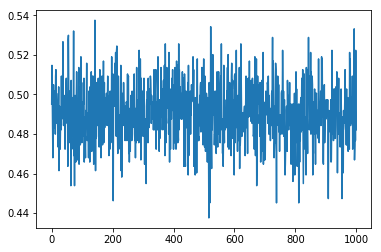

In [4]:
# KNN classifier accuacy:
KNN1k = [0.495114006514658, 0.5146579804560261, 0.499457111834962, 0.4799131378935939, 0.46796959826275786, 0.494028230184582, 0.504885993485342, 0.496199782844734, 0.4831704668838219, 0.498371335504886, 0.501628664495114, 0.498371335504886, 0.4799131378935939, 0.509229098805646, 0.512486427795874, 0.48534201954397393, 0.500542888165038, 0.496199782844734, 0.48968512486427795, 0.49077090119435396, 0.4831704668838219, 0.4733984799131379, 0.48642779587404994, 0.503800217155266, 0.46145494028230183, 0.4831704668838219, 0.494028230184582, 0.48642779587404994, 0.4723127035830619, 0.48425624321389793, 0.49077090119435396, 0.4820846905537459, 0.509229098805646, 0.48751357220412594, 0.49185667752442996, 0.48968512486427795, 0.504885993485342, 0.5266015200868621, 0.498371335504886, 0.48425624321389793, 0.49077090119435396, 0.498371335504886, 0.496199782844734, 0.499457111834962, 0.4723127035830619, 0.49185667752442996, 0.49185667752442996, 0.50271444082519, 0.50814332247557, 0.495114006514658, 0.49185667752442996, 0.48534201954397393, 0.494028230184582, 0.46362649294245384, 0.5276872964169381, 0.5298588490770901, 0.50271444082519, 0.48751357220412594, 0.500542888165038, 0.501628664495114, 0.4755700325732899, 0.49728555917481, 0.501628664495114, 0.4538545059717698, 0.507057546145494, 0.48534201954397393, 0.4723127035830619, 0.496199782844734, 0.4788273615635179, 0.498371335504886, 0.49728555917481, 0.49185667752442996, 0.5320304017372421, 0.46905537459283386, 0.48425624321389793, 0.4538545059717698, 0.49728555917481, 0.499457111834962, 0.48751357220412594, 0.46579804560260585, 0.4733984799131379, 0.499457111834962, 0.511400651465798, 0.496199782844734, 0.4820846905537459, 0.46688382193268185, 0.48534201954397393, 0.49294245385450597, 0.496199782844734, 0.5135722041259501, 0.46471226927252984, 0.499457111834962, 0.496199782844734, 0.503800217155266, 0.4744842562432139, 0.48751357220412594, 0.5190010857763301, 0.48968512486427795, 0.496199782844734, 0.4755700325732899, 0.48859934853420195, 0.496199782844734, 0.4788273615635179, 0.49185667752442996, 0.505971769815418, 0.495114006514658, 0.50814332247557, 0.46579804560260585, 0.48534201954397393, 0.48859934853420195, 0.4744842562432139, 0.46796959826275786, 0.49185667752442996, 0.4831704668838219, 0.50271444082519, 0.5157437567861021, 0.48968512486427795, 0.4766558089033659, 0.4788273615635179, 0.4799131378935939, 0.49077090119435396, 0.46796959826275786, 0.501628664495114, 0.4809989142236699, 0.48968512486427795, 0.46579804560260585, 0.503800217155266, 0.4744842562432139, 0.48968512486427795, 0.4820846905537459, 0.511400651465798, 0.47122692725298587, 0.47122692725298587, 0.509229098805646, 0.4809989142236699, 0.501628664495114, 0.509229098805646, 0.49077090119435396, 0.46471226927252984, 0.498371335504886, 0.507057546145494, 0.46579804560260585, 0.5374592833876222, 0.503800217155266, 0.46145494028230183, 0.498371335504886, 0.4777415852334419, 0.4788273615635179, 0.505971769815418, 0.503800217155266, 0.48968512486427795, 0.48425624321389793, 0.48642779587404994, 0.50814332247557, 0.48751357220412594, 0.48859934853420195, 0.4733984799131379, 0.496199782844734, 0.512486427795874, 0.48968512486427795, 0.4744842562432139, 0.4766558089033659, 0.46796959826275786, 0.4820846905537459, 0.4820846905537459, 0.509229098805646, 0.49077090119435396, 0.4744842562432139, 0.503800217155266, 0.49294245385450597, 0.5168295331161781, 0.4755700325732899, 0.495114006514658, 0.505971769815418, 0.4831704668838219, 0.48642779587404994, 0.498371335504886, 0.49728555917481, 0.49294245385450597, 0.48534201954397393, 0.500542888165038, 0.49185667752442996, 0.48425624321389793, 0.49728555917481, 0.509229098805646, 0.48859934853420195, 0.48642779587404994, 0.49185667752442996, 0.46905537459283386, 0.499457111834962, 0.48642779587404994, 0.4723127035830619, 0.501628664495114, 0.48534201954397393, 0.4755700325732899, 0.4777415852334419, 0.48968512486427795, 0.5190010857763301, 0.4809989142236699, 0.494028230184582, 0.4809989142236699, 0.510314875135722, 0.44625407166123776, 0.495114006514658, 0.495114006514658, 0.50814332247557, 0.494028230184582, 0.505971769815418, 0.5157437567861021, 0.507057546145494, 0.5211726384364821, 0.498371335504886, 0.4788273615635179, 0.5222584147665581, 0.5244299674267101, 0.50271444082519, 0.4809989142236699, 0.47014115092290987, 0.4788273615635179, 0.509229098805646, 0.4809989142236699, 0.4766558089033659, 0.48751357220412594, 0.48425624321389793, 0.48968512486427795, 0.4723127035830619, 0.49294245385450597, 0.5146579804560261, 0.46145494028230183, 0.49185667752442996, 0.4581976112920738, 0.48534201954397393, 0.500542888165038, 0.498371335504886, 0.48425624321389793, 0.498371335504886, 0.505971769815418, 0.499457111834962, 0.495114006514658, 0.49077090119435396, 0.4820846905537459, 0.4766558089033659, 0.4820846905537459, 0.494028230184582, 0.4809989142236699, 0.496199782844734, 0.495114006514658, 0.4766558089033659, 0.48859934853420195, 0.510314875135722, 0.4809989142236699, 0.50814332247557, 0.509229098805646, 0.47014115092290987, 0.49294245385450597, 0.46579804560260585, 0.48534201954397393, 0.48534201954397393, 0.47122692725298587, 0.48751357220412594, 0.499457111834962, 0.4777415852334419, 0.494028230184582, 0.4766558089033659, 0.501628664495114, 0.48751357220412594, 0.4831704668838219, 0.48425624321389793, 0.494028230184582, 0.49077090119435396, 0.48534201954397393, 0.510314875135722, 0.4799131378935939, 0.4766558089033659, 0.49294245385450597, 0.46796959826275786, 0.49185667752442996, 0.4755700325732899, 0.48968512486427795, 0.5135722041259501, 0.4766558089033659, 0.4788273615635179, 0.4788273615635179, 0.4820846905537459, 0.49728555917481, 0.496199782844734, 0.4755700325732899, 0.5222584147665581, 0.48751357220412594, 0.4777415852334419, 0.49185667752442996, 0.5179153094462541, 0.501628664495114, 0.46688382193268185, 0.50814332247557, 0.4820846905537459, 0.49185667752442996, 0.49294245385450597, 0.501628664495114, 0.48534201954397393, 0.4788273615635179, 0.495114006514658, 0.50271444082519, 0.50814332247557, 0.49077090119435396, 0.46471226927252984, 0.48534201954397393, 0.4799131378935939, 0.48751357220412594, 0.4744842562432139, 0.4549402823018458, 0.494028230184582, 0.49728555917481, 0.49185667752442996, 0.501628664495114, 0.49294245385450597, 0.4755700325732899, 0.50814332247557, 0.48642779587404994, 0.4831704668838219, 0.49185667752442996, 0.500542888165038, 0.50271444082519, 0.495114006514658, 0.509229098805646, 0.507057546145494, 0.501628664495114, 0.48534201954397393, 0.499457111834962, 0.48751357220412594, 0.494028230184582, 0.49077090119435396, 0.496199782844734, 0.496199782844734, 0.4820846905537459, 0.500542888165038, 0.512486427795874, 0.4820846905537459, 0.509229098805646, 0.495114006514658, 0.501628664495114, 0.50814332247557, 0.512486427795874, 0.4723127035830619, 0.496199782844734, 0.48534201954397393, 0.48534201954397393, 0.4820846905537459, 0.49728555917481, 0.5190010857763301, 0.48534201954397393, 0.48642779587404994, 0.494028230184582, 0.47122692725298587, 0.49728555917481, 0.4777415852334419, 0.494028230184582, 0.494028230184582, 0.4820846905537459, 0.5135722041259501, 0.504885993485342, 0.48859934853420195, 0.496199782844734, 0.50271444082519, 0.49294245385450597, 0.4820846905537459, 0.49728555917481, 0.507057546145494, 0.498371335504886, 0.49728555917481, 0.5146579804560261, 0.48968512486427795, 0.46905537459283386, 0.5255157437567861, 0.498371335504886, 0.4755700325732899, 0.48859934853420195, 0.48534201954397393, 0.5135722041259501, 0.495114006514658, 0.50814332247557, 0.494028230184582, 0.49294245385450597, 0.505971769815418, 0.4799131378935939, 0.5211726384364821, 0.48859934853420195, 0.46579804560260585, 0.494028230184582, 0.49294245385450597, 0.4723127035830619, 0.50271444082519, 0.498371335504886, 0.48751357220412594, 0.496199782844734, 0.50814332247557, 0.499457111834962, 0.512486427795874, 0.49185667752442996, 0.504885993485342, 0.4723127035830619, 0.50271444082519, 0.498371335504886, 0.4755700325732899, 0.4820846905537459, 0.5135722041259501, 0.510314875135722, 0.495114006514658, 0.4723127035830619, 0.4733984799131379, 0.5168295331161781, 0.49077090119435396, 0.4799131378935939, 0.5146579804560261, 0.4755700325732899, 0.4799131378935939, 0.4766558089033659, 0.5255157437567861, 0.4820846905537459, 0.512486427795874, 0.50271444082519, 0.501628664495114, 0.503800217155266, 0.494028230184582, 0.500542888165038, 0.48751357220412594, 0.495114006514658, 0.496199782844734, 0.48751357220412594, 0.511400651465798, 0.48968512486427795, 0.498371335504886, 0.49728555917481, 0.50814332247557, 0.46362649294245384, 0.48968512486427795, 0.510314875135722, 0.501628664495114, 0.46796959826275786, 0.46362649294245384, 0.48859934853420195, 0.501628664495114, 0.4831704668838219, 0.49185667752442996, 0.49294245385450597, 0.4831704668838219, 0.494028230184582, 0.505971769815418, 0.4592833876221498, 0.5146579804560261, 0.46905537459283386, 0.49077090119435396, 0.49077090119435396, 0.494028230184582, 0.48859934853420195, 0.501628664495114, 0.4799131378935939, 0.49728555917481, 0.48968512486427795, 0.504885993485342, 0.498371335504886, 0.499457111834962, 0.49728555917481, 0.503800217155266, 0.5190010857763301, 0.496199782844734, 0.512486427795874, 0.46362649294245384, 0.48968512486427795, 0.48751357220412594, 0.4831704668838219, 0.4592833876221498, 0.498371335504886, 0.46579804560260585, 0.4603691639522258, 0.494028230184582, 0.4603691639522258, 0.48751357220412594, 0.5179153094462541, 0.4820846905537459, 0.495114006514658, 0.4766558089033659, 0.4788273615635179, 0.4766558089033659, 0.48642779587404994, 0.48425624321389793, 0.499457111834962, 0.495114006514658, 0.503800217155266, 0.505971769815418, 0.4809989142236699, 0.49185667752442996, 0.4831704668838219, 0.5135722041259501, 0.496199782844734, 0.48968512486427795, 0.48425624321389793, 0.4744842562432139, 0.509229098805646, 0.5179153094462541, 0.50814332247557, 0.49294245385450597, 0.4733984799131379, 0.509229098805646, 0.48642779587404994, 0.47122692725298587, 0.4766558089033659, 0.49077090119435396, 0.500542888165038, 0.49728555917481, 0.49077090119435396, 0.46579804560260585, 0.498371335504886, 0.495114006514658, 0.49294245385450597, 0.47014115092290987, 0.4375678610206297, 0.505971769815418, 0.499457111834962, 0.44516829533116176, 0.46145494028230183, 0.4755700325732899, 0.5342019543973942, 0.501628664495114, 0.4755700325732899, 0.46254071661237783, 0.503800217155266, 0.4820846905537459, 0.498371335504886, 0.5200868621064061, 0.496199782844734, 0.48968512486427795, 0.501628664495114, 0.48534201954397393, 0.4744842562432139, 0.4799131378935939, 0.4777415852334419, 0.501628664495114, 0.496199782844734, 0.4820846905537459, 0.47014115092290987, 0.501628664495114, 0.48534201954397393, 0.511400651465798, 0.4820846905537459, 0.4733984799131379, 0.50271444082519, 0.4820846905537459, 0.511400651465798, 0.4799131378935939, 0.48859934853420195, 0.499457111834962, 0.4831704668838219, 0.4755700325732899, 0.504885993485342, 0.509229098805646, 0.49077090119435396, 0.5255157437567861, 0.4831704668838219, 0.4820846905537459, 0.48751357220412594, 0.47014115092290987, 0.48425624321389793, 0.46362649294245384, 0.4799131378935939, 0.5146579804560261, 0.4831704668838219, 0.4755700325732899, 0.49728555917481, 0.4820846905537459, 0.48859934853420195, 0.49185667752442996, 0.49294245385450597, 0.49185667752442996, 0.4831704668838219, 0.501628664495114, 0.500542888165038, 0.5135722041259501, 0.4733984799131379, 0.5200868621064061, 0.50271444082519, 0.500542888165038, 0.4723127035830619, 0.49728555917481, 0.505971769815418, 0.501628664495114, 0.494028230184582, 0.499457111834962, 0.4809989142236699, 0.46905537459283386, 0.509229098805646, 0.5157437567861021, 0.503800217155266, 0.50271444082519, 0.507057546145494, 0.4777415852334419, 0.49077090119435396, 0.48534201954397393, 0.49728555917481, 0.4592833876221498, 0.509229098805646, 0.510314875135722, 0.4755700325732899, 0.49077090119435396, 0.498371335504886, 0.4831704668838219, 0.5222584147665581, 0.49185667752442996, 0.48751357220412594, 0.48425624321389793, 0.47122692725298587, 0.499457111834962, 0.48968512486427795, 0.48968512486427795, 0.4766558089033659, 0.48968512486427795, 0.5135722041259501, 0.46254071661237783, 0.49294245385450597, 0.4744842562432139, 0.4788273615635179, 0.5255157437567861, 0.50814332247557, 0.494028230184582, 0.4788273615635179, 0.4788273615635179, 0.49077090119435396, 0.48859934853420195, 0.4809989142236699, 0.49077090119435396, 0.48534201954397393, 0.48751357220412594, 0.49185667752442996, 0.494028230184582, 0.4788273615635179, 0.46905537459283386, 0.48642779587404994, 0.49728555917481, 0.509229098805646, 0.48425624321389793, 0.4831704668838219, 0.49185667752442996, 0.49077090119435396, 0.47014115092290987, 0.501628664495114, 0.50814332247557, 0.48859934853420195, 0.495114006514658, 0.49294245385450597, 0.5168295331161781, 0.49294245385450597, 0.49294245385450597, 0.48859934853420195, 0.505971769815418, 0.48642779587404994, 0.507057546145494, 0.501628664495114, 0.49185667752442996, 0.48534201954397393, 0.50814332247557, 0.501628664495114, 0.504885993485342, 0.4788273615635179, 0.4799131378935939, 0.500542888165038, 0.4723127035830619, 0.49077090119435396, 0.5190010857763301, 0.48968512486427795, 0.46905537459283386, 0.5135722041259501, 0.4820846905537459, 0.5179153094462541, 0.4538545059717698, 0.47014115092290987, 0.494028230184582, 0.509229098805646, 0.500542888165038, 0.500542888165038, 0.495114006514658, 0.504885993485342, 0.48534201954397393, 0.48968512486427795, 0.4788273615635179, 0.505971769815418, 0.4820846905537459, 0.46579804560260585, 0.4723127035830619, 0.4744842562432139, 0.48642779587404994, 0.507057546145494, 0.4777415852334419, 0.47122692725298587, 0.49728555917481, 0.5211726384364821, 0.46471226927252984, 0.496199782844734, 0.48968512486427795, 0.46688382193268185, 0.48751357220412594, 0.46688382193268185, 0.46796959826275786, 0.48968512486427795, 0.501628664495114, 0.496199782844734, 0.498371335504886, 0.48968512486427795, 0.48968512486427795, 0.505971769815418, 0.504885993485342, 0.48534201954397393, 0.509229098805646, 0.494028230184582, 0.4799131378935939, 0.499457111834962, 0.48751357220412594, 0.49077090119435396, 0.49294245385450597, 0.4766558089033659, 0.48751357220412594, 0.49185667752442996, 0.48425624321389793, 0.500542888165038, 0.501628664495114, 0.500542888165038, 0.5287730727470141, 0.4777415852334419, 0.5168295331161781, 0.50814332247557, 0.48642779587404994, 0.46796959826275786, 0.4723127035830619, 0.4766558089033659, 0.494028230184582, 0.4755700325732899, 0.5157437567861021, 0.512486427795874, 0.4820846905537459, 0.44516829533116176, 0.495114006514658, 0.48751357220412594, 0.48642779587404994, 0.509229098805646, 0.49294245385450597, 0.48425624321389793, 0.504885993485342, 0.4809989142236699, 0.48859934853420195, 0.47122692725298587, 0.48968512486427795, 0.4799131378935939, 0.48751357220412594, 0.48425624321389793, 0.4820846905537459, 0.500542888165038, 0.501628664495114, 0.4799131378935939, 0.495114006514658, 0.5222584147665581, 0.50271444082519, 0.48751357220412594, 0.501628664495114, 0.4788273615635179, 0.48425624321389793, 0.49728555917481, 0.46688382193268185, 0.4592833876221498, 0.46471226927252984, 0.4733984799131379, 0.4788273615635179, 0.49185667752442996, 0.494028230184582, 0.48425624321389793, 0.47122692725298587, 0.507057546145494, 0.494028230184582, 0.48968512486427795, 0.48425624321389793, 0.4820846905537459, 0.499457111834962, 0.48859934853420195, 0.505971769815418, 0.48425624321389793, 0.48534201954397393, 0.495114006514658, 0.494028230184582, 0.46471226927252984, 0.4820846905537459, 0.48642779587404994, 0.495114006514658, 0.49077090119435396, 0.46796959826275786, 0.4560260586319218, 0.495114006514658, 0.4809989142236699, 0.495114006514658, 0.4831704668838219, 0.500542888165038, 0.4592833876221498, 0.48968512486427795, 0.48642779587404994, 0.4755700325732899, 0.511400651465798, 0.48534201954397393, 0.50271444082519, 0.48642779587404994, 0.46362649294245384, 0.4733984799131379, 0.4831704668838219, 0.4831704668838219, 0.495114006514658, 0.44516829533116176, 0.48425624321389793, 0.49294245385450597, 0.46579804560260585, 0.495114006514658, 0.4766558089033659, 0.496199782844734, 0.498371335504886, 0.4809989142236699, 0.495114006514658, 0.50814332247557, 0.4820846905537459, 0.495114006514658, 0.512486427795874, 0.4820846905537459, 0.4549402823018458, 0.4723127035830619, 0.49294245385450597, 0.510314875135722, 0.4755700325732899, 0.4820846905537459, 0.4723127035830619, 0.48859934853420195, 0.48642779587404994, 0.4592833876221498, 0.5135722041259501, 0.48534201954397393, 0.4788273615635179, 0.4820846905537459, 0.47014115092290987, 0.512486427795874, 0.501628664495114, 0.5287730727470141, 0.499457111834962, 0.509229098805646, 0.4820846905537459, 0.48751357220412594, 0.48751357220412594, 0.48968512486427795, 0.5211726384364821, 0.4799131378935939, 0.511400651465798, 0.494028230184582, 0.499457111834962, 0.509229098805646, 0.504885993485342, 0.4592833876221498, 0.4755700325732899, 0.47014115092290987, 0.49294245385450597, 0.496199782844734, 0.4799131378935939, 0.50271444082519, 0.48425624321389793, 0.49294245385450597, 0.46471226927252984, 0.500542888165038, 0.499457111834962, 0.500542888165038, 0.48751357220412594, 0.48751357220412594, 0.4799131378935939, 0.49185667752442996, 0.49185667752442996, 0.4777415852334419, 0.5179153094462541, 0.4788273615635179, 0.4755700325732899, 0.48859934853420195, 0.48534201954397393, 0.496199782844734, 0.496199782844734, 0.501628664495114, 0.48425624321389793, 0.48534201954397393, 0.5190010857763301, 0.496199782844734, 0.5179153094462541, 0.48859934853420195, 0.501628664495114, 0.46579804560260585, 0.46471226927252984, 0.49294245385450597, 0.500542888165038, 0.504885993485342, 0.4755700325732899, 0.4831704668838219, 0.495114006514658, 0.49077090119435396, 0.48751357220412594, 0.49728555917481, 0.48859934853420195, 0.496199782844734, 0.48968512486427795, 0.48968512486427795, 0.49728555917481, 0.4755700325732899, 0.44733984799131377, 0.4766558089033659, 0.49185667752442996, 0.48425624321389793, 0.48751357220412594, 0.48751357220412594, 0.4809989142236699, 0.4831704668838219, 0.49728555917481, 0.46579804560260585, 0.46688382193268185, 0.4831704668838219, 0.5222584147665581, 0.494028230184582, 0.495114006514658, 0.4799131378935939, 0.500542888165038, 0.4766558089033659, 0.50271444082519, 0.494028230184582, 0.4799131378935939, 0.50271444082519, 0.494028230184582, 0.4777415852334419, 0.48425624321389793, 0.503800217155266, 0.498371335504886, 0.49077090119435396, 0.511400651465798, 0.496199782844734, 0.4603691639522258, 0.48425624321389793, 0.4799131378935939, 0.496199782844734, 0.50814332247557, 0.4831704668838219, 0.49077090119435396, 0.48425624321389793, 0.48425624321389793, 0.4733984799131379, 0.48534201954397393, 0.49185667752442996, 0.50271444082519, 0.48751357220412594, 0.48642779587404994, 0.44733984799131377, 0.48859934853420195, 0.48642779587404994, 0.48642779587404994, 0.4603691639522258, 0.49185667752442996, 0.48534201954397393, 0.48859934853420195, 0.48751357220412594, 0.496199782844734, 0.512486427795874, 0.48425624321389793, 0.4820846905537459, 0.49185667752442996, 0.4744842562432139, 0.50271444082519, 0.4744842562432139, 0.4809989142236699, 0.48968512486427795, 0.498371335504886, 0.47122692725298587, 0.48751357220412594, 0.49077090119435396, 0.48642779587404994, 0.4723127035830619, 0.5211726384364821, 0.500542888165038, 0.5179153094462541, 0.48425624321389793, 0.49185667752442996, 0.49077090119435396, 0.48534201954397393, 0.498371335504886, 0.48534201954397393, 0.509229098805646, 0.4723127035830619, 0.4755700325732899, 0.501628664495114, 0.48534201954397393, 0.50271444082519, 0.5331161780673181, 0.46688382193268185, 0.4744842562432139, 0.504885993485342, 0.4766558089033659, 0.5222584147665581, 0.4820846905537459]
plt.plot(KNN1k)

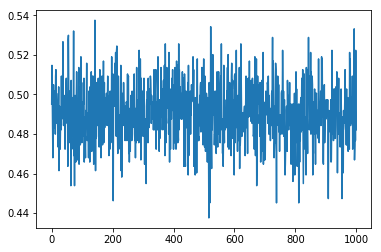

In [4]:
# KNN classifier accuacy:
KNN1k = [0.495114006514658, 0.5146579804560261, 0.499457111834962, 0.4799131378935939, 0.46796959826275786, 0.494028230184582, 0.504885993485342, 0.496199782844734, 0.4831704668838219, 0.498371335504886, 0.501628664495114, 0.498371335504886, 0.4799131378935939, 0.509229098805646, 0.512486427795874, 0.48534201954397393, 0.500542888165038, 0.496199782844734, 0.48968512486427795, 0.49077090119435396, 0.4831704668838219, 0.4733984799131379, 0.48642779587404994, 0.503800217155266, 0.46145494028230183, 0.4831704668838219, 0.494028230184582, 0.48642779587404994, 0.4723127035830619, 0.48425624321389793, 0.49077090119435396, 0.4820846905537459, 0.509229098805646, 0.48751357220412594, 0.49185667752442996, 0.48968512486427795, 0.504885993485342, 0.5266015200868621, 0.498371335504886, 0.48425624321389793, 0.49077090119435396, 0.498371335504886, 0.496199782844734, 0.499457111834962, 0.4723127035830619, 0.49185667752442996, 0.49185667752442996, 0.50271444082519, 0.50814332247557, 0.495114006514658, 0.49185667752442996, 0.48534201954397393, 0.494028230184582, 0.46362649294245384, 0.5276872964169381, 0.5298588490770901, 0.50271444082519, 0.48751357220412594, 0.500542888165038, 0.501628664495114, 0.4755700325732899, 0.49728555917481, 0.501628664495114, 0.4538545059717698, 0.507057546145494, 0.48534201954397393, 0.4723127035830619, 0.496199782844734, 0.4788273615635179, 0.498371335504886, 0.49728555917481, 0.49185667752442996, 0.5320304017372421, 0.46905537459283386, 0.48425624321389793, 0.4538545059717698, 0.49728555917481, 0.499457111834962, 0.48751357220412594, 0.46579804560260585, 0.4733984799131379, 0.499457111834962, 0.511400651465798, 0.496199782844734, 0.4820846905537459, 0.46688382193268185, 0.48534201954397393, 0.49294245385450597, 0.496199782844734, 0.5135722041259501, 0.46471226927252984, 0.499457111834962, 0.496199782844734, 0.503800217155266, 0.4744842562432139, 0.48751357220412594, 0.5190010857763301, 0.48968512486427795, 0.496199782844734, 0.4755700325732899, 0.48859934853420195, 0.496199782844734, 0.4788273615635179, 0.49185667752442996, 0.505971769815418, 0.495114006514658, 0.50814332247557, 0.46579804560260585, 0.48534201954397393, 0.48859934853420195, 0.4744842562432139, 0.46796959826275786, 0.49185667752442996, 0.4831704668838219, 0.50271444082519, 0.5157437567861021, 0.48968512486427795, 0.4766558089033659, 0.4788273615635179, 0.4799131378935939, 0.49077090119435396, 0.46796959826275786, 0.501628664495114, 0.4809989142236699, 0.48968512486427795, 0.46579804560260585, 0.503800217155266, 0.4744842562432139, 0.48968512486427795, 0.4820846905537459, 0.511400651465798, 0.47122692725298587, 0.47122692725298587, 0.509229098805646, 0.4809989142236699, 0.501628664495114, 0.509229098805646, 0.49077090119435396, 0.46471226927252984, 0.498371335504886, 0.507057546145494, 0.46579804560260585, 0.5374592833876222, 0.503800217155266, 0.46145494028230183, 0.498371335504886, 0.4777415852334419, 0.4788273615635179, 0.505971769815418, 0.503800217155266, 0.48968512486427795, 0.48425624321389793, 0.48642779587404994, 0.50814332247557, 0.48751357220412594, 0.48859934853420195, 0.4733984799131379, 0.496199782844734, 0.512486427795874, 0.48968512486427795, 0.4744842562432139, 0.4766558089033659, 0.46796959826275786, 0.4820846905537459, 0.4820846905537459, 0.509229098805646, 0.49077090119435396, 0.4744842562432139, 0.503800217155266, 0.49294245385450597, 0.5168295331161781, 0.4755700325732899, 0.495114006514658, 0.505971769815418, 0.4831704668838219, 0.48642779587404994, 0.498371335504886, 0.49728555917481, 0.49294245385450597, 0.48534201954397393, 0.500542888165038, 0.49185667752442996, 0.48425624321389793, 0.49728555917481, 0.509229098805646, 0.48859934853420195, 0.48642779587404994, 0.49185667752442996, 0.46905537459283386, 0.499457111834962, 0.48642779587404994, 0.4723127035830619, 0.501628664495114, 0.48534201954397393, 0.4755700325732899, 0.4777415852334419, 0.48968512486427795, 0.5190010857763301, 0.4809989142236699, 0.494028230184582, 0.4809989142236699, 0.510314875135722, 0.44625407166123776, 0.495114006514658, 0.495114006514658, 0.50814332247557, 0.494028230184582, 0.505971769815418, 0.5157437567861021, 0.507057546145494, 0.5211726384364821, 0.498371335504886, 0.4788273615635179, 0.5222584147665581, 0.5244299674267101, 0.50271444082519, 0.4809989142236699, 0.47014115092290987, 0.4788273615635179, 0.509229098805646, 0.4809989142236699, 0.4766558089033659, 0.48751357220412594, 0.48425624321389793, 0.48968512486427795, 0.4723127035830619, 0.49294245385450597, 0.5146579804560261, 0.46145494028230183, 0.49185667752442996, 0.4581976112920738, 0.48534201954397393, 0.500542888165038, 0.498371335504886, 0.48425624321389793, 0.498371335504886, 0.505971769815418, 0.499457111834962, 0.495114006514658, 0.49077090119435396, 0.4820846905537459, 0.4766558089033659, 0.4820846905537459, 0.494028230184582, 0.4809989142236699, 0.496199782844734, 0.495114006514658, 0.4766558089033659, 0.48859934853420195, 0.510314875135722, 0.4809989142236699, 0.50814332247557, 0.509229098805646, 0.47014115092290987, 0.49294245385450597, 0.46579804560260585, 0.48534201954397393, 0.48534201954397393, 0.47122692725298587, 0.48751357220412594, 0.499457111834962, 0.4777415852334419, 0.494028230184582, 0.4766558089033659, 0.501628664495114, 0.48751357220412594, 0.4831704668838219, 0.48425624321389793, 0.494028230184582, 0.49077090119435396, 0.48534201954397393, 0.510314875135722, 0.4799131378935939, 0.4766558089033659, 0.49294245385450597, 0.46796959826275786, 0.49185667752442996, 0.4755700325732899, 0.48968512486427795, 0.5135722041259501, 0.4766558089033659, 0.4788273615635179, 0.4788273615635179, 0.4820846905537459, 0.49728555917481, 0.496199782844734, 0.4755700325732899, 0.5222584147665581, 0.48751357220412594, 0.4777415852334419, 0.49185667752442996, 0.5179153094462541, 0.501628664495114, 0.46688382193268185, 0.50814332247557, 0.4820846905537459, 0.49185667752442996, 0.49294245385450597, 0.501628664495114, 0.48534201954397393, 0.4788273615635179, 0.495114006514658, 0.50271444082519, 0.50814332247557, 0.49077090119435396, 0.46471226927252984, 0.48534201954397393, 0.4799131378935939, 0.48751357220412594, 0.4744842562432139, 0.4549402823018458, 0.494028230184582, 0.49728555917481, 0.49185667752442996, 0.501628664495114, 0.49294245385450597, 0.4755700325732899, 0.50814332247557, 0.48642779587404994, 0.4831704668838219, 0.49185667752442996, 0.500542888165038, 0.50271444082519, 0.495114006514658, 0.509229098805646, 0.507057546145494, 0.501628664495114, 0.48534201954397393, 0.499457111834962, 0.48751357220412594, 0.494028230184582, 0.49077090119435396, 0.496199782844734, 0.496199782844734, 0.4820846905537459, 0.500542888165038, 0.512486427795874, 0.4820846905537459, 0.509229098805646, 0.495114006514658, 0.501628664495114, 0.50814332247557, 0.512486427795874, 0.4723127035830619, 0.496199782844734, 0.48534201954397393, 0.48534201954397393, 0.4820846905537459, 0.49728555917481, 0.5190010857763301, 0.48534201954397393, 0.48642779587404994, 0.494028230184582, 0.47122692725298587, 0.49728555917481, 0.4777415852334419, 0.494028230184582, 0.494028230184582, 0.4820846905537459, 0.5135722041259501, 0.504885993485342, 0.48859934853420195, 0.496199782844734, 0.50271444082519, 0.49294245385450597, 0.4820846905537459, 0.49728555917481, 0.507057546145494, 0.498371335504886, 0.49728555917481, 0.5146579804560261, 0.48968512486427795, 0.46905537459283386, 0.5255157437567861, 0.498371335504886, 0.4755700325732899, 0.48859934853420195, 0.48534201954397393, 0.5135722041259501, 0.495114006514658, 0.50814332247557, 0.494028230184582, 0.49294245385450597, 0.505971769815418, 0.4799131378935939, 0.5211726384364821, 0.48859934853420195, 0.46579804560260585, 0.494028230184582, 0.49294245385450597, 0.4723127035830619, 0.50271444082519, 0.498371335504886, 0.48751357220412594, 0.496199782844734, 0.50814332247557, 0.499457111834962, 0.512486427795874, 0.49185667752442996, 0.504885993485342, 0.4723127035830619, 0.50271444082519, 0.498371335504886, 0.4755700325732899, 0.4820846905537459, 0.5135722041259501, 0.510314875135722, 0.495114006514658, 0.4723127035830619, 0.4733984799131379, 0.5168295331161781, 0.49077090119435396, 0.4799131378935939, 0.5146579804560261, 0.4755700325732899, 0.4799131378935939, 0.4766558089033659, 0.5255157437567861, 0.4820846905537459, 0.512486427795874, 0.50271444082519, 0.501628664495114, 0.503800217155266, 0.494028230184582, 0.500542888165038, 0.48751357220412594, 0.495114006514658, 0.496199782844734, 0.48751357220412594, 0.511400651465798, 0.48968512486427795, 0.498371335504886, 0.49728555917481, 0.50814332247557, 0.46362649294245384, 0.48968512486427795, 0.510314875135722, 0.501628664495114, 0.46796959826275786, 0.46362649294245384, 0.48859934853420195, 0.501628664495114, 0.4831704668838219, 0.49185667752442996, 0.49294245385450597, 0.4831704668838219, 0.494028230184582, 0.505971769815418, 0.4592833876221498, 0.5146579804560261, 0.46905537459283386, 0.49077090119435396, 0.49077090119435396, 0.494028230184582, 0.48859934853420195, 0.501628664495114, 0.4799131378935939, 0.49728555917481, 0.48968512486427795, 0.504885993485342, 0.498371335504886, 0.499457111834962, 0.49728555917481, 0.503800217155266, 0.5190010857763301, 0.496199782844734, 0.512486427795874, 0.46362649294245384, 0.48968512486427795, 0.48751357220412594, 0.4831704668838219, 0.4592833876221498, 0.498371335504886, 0.46579804560260585, 0.4603691639522258, 0.494028230184582, 0.4603691639522258, 0.48751357220412594, 0.5179153094462541, 0.4820846905537459, 0.495114006514658, 0.4766558089033659, 0.4788273615635179, 0.4766558089033659, 0.48642779587404994, 0.48425624321389793, 0.499457111834962, 0.495114006514658, 0.503800217155266, 0.505971769815418, 0.4809989142236699, 0.49185667752442996, 0.4831704668838219, 0.5135722041259501, 0.496199782844734, 0.48968512486427795, 0.48425624321389793, 0.4744842562432139, 0.509229098805646, 0.5179153094462541, 0.50814332247557, 0.49294245385450597, 0.4733984799131379, 0.509229098805646, 0.48642779587404994, 0.47122692725298587, 0.4766558089033659, 0.49077090119435396, 0.500542888165038, 0.49728555917481, 0.49077090119435396, 0.46579804560260585, 0.498371335504886, 0.495114006514658, 0.49294245385450597, 0.47014115092290987, 0.4375678610206297, 0.505971769815418, 0.499457111834962, 0.44516829533116176, 0.46145494028230183, 0.4755700325732899, 0.5342019543973942, 0.501628664495114, 0.4755700325732899, 0.46254071661237783, 0.503800217155266, 0.4820846905537459, 0.498371335504886, 0.5200868621064061, 0.496199782844734, 0.48968512486427795, 0.501628664495114, 0.48534201954397393, 0.4744842562432139, 0.4799131378935939, 0.4777415852334419, 0.501628664495114, 0.496199782844734, 0.4820846905537459, 0.47014115092290987, 0.501628664495114, 0.48534201954397393, 0.511400651465798, 0.4820846905537459, 0.4733984799131379, 0.50271444082519, 0.4820846905537459, 0.511400651465798, 0.4799131378935939, 0.48859934853420195, 0.499457111834962, 0.4831704668838219, 0.4755700325732899, 0.504885993485342, 0.509229098805646, 0.49077090119435396, 0.5255157437567861, 0.4831704668838219, 0.4820846905537459, 0.48751357220412594, 0.47014115092290987, 0.48425624321389793, 0.46362649294245384, 0.4799131378935939, 0.5146579804560261, 0.4831704668838219, 0.4755700325732899, 0.49728555917481, 0.4820846905537459, 0.48859934853420195, 0.49185667752442996, 0.49294245385450597, 0.49185667752442996, 0.4831704668838219, 0.501628664495114, 0.500542888165038, 0.5135722041259501, 0.4733984799131379, 0.5200868621064061, 0.50271444082519, 0.500542888165038, 0.4723127035830619, 0.49728555917481, 0.505971769815418, 0.501628664495114, 0.494028230184582, 0.499457111834962, 0.4809989142236699, 0.46905537459283386, 0.509229098805646, 0.5157437567861021, 0.503800217155266, 0.50271444082519, 0.507057546145494, 0.4777415852334419, 0.49077090119435396, 0.48534201954397393, 0.49728555917481, 0.4592833876221498, 0.509229098805646, 0.510314875135722, 0.4755700325732899, 0.49077090119435396, 0.498371335504886, 0.4831704668838219, 0.5222584147665581, 0.49185667752442996, 0.48751357220412594, 0.48425624321389793, 0.47122692725298587, 0.499457111834962, 0.48968512486427795, 0.48968512486427795, 0.4766558089033659, 0.48968512486427795, 0.5135722041259501, 0.46254071661237783, 0.49294245385450597, 0.4744842562432139, 0.4788273615635179, 0.5255157437567861, 0.50814332247557, 0.494028230184582, 0.4788273615635179, 0.4788273615635179, 0.49077090119435396, 0.48859934853420195, 0.4809989142236699, 0.49077090119435396, 0.48534201954397393, 0.48751357220412594, 0.49185667752442996, 0.494028230184582, 0.4788273615635179, 0.46905537459283386, 0.48642779587404994, 0.49728555917481, 0.509229098805646, 0.48425624321389793, 0.4831704668838219, 0.49185667752442996, 0.49077090119435396, 0.47014115092290987, 0.501628664495114, 0.50814332247557, 0.48859934853420195, 0.495114006514658, 0.49294245385450597, 0.5168295331161781, 0.49294245385450597, 0.49294245385450597, 0.48859934853420195, 0.505971769815418, 0.48642779587404994, 0.507057546145494, 0.501628664495114, 0.49185667752442996, 0.48534201954397393, 0.50814332247557, 0.501628664495114, 0.504885993485342, 0.4788273615635179, 0.4799131378935939, 0.500542888165038, 0.4723127035830619, 0.49077090119435396, 0.5190010857763301, 0.48968512486427795, 0.46905537459283386, 0.5135722041259501, 0.4820846905537459, 0.5179153094462541, 0.4538545059717698, 0.47014115092290987, 0.494028230184582, 0.509229098805646, 0.500542888165038, 0.500542888165038, 0.495114006514658, 0.504885993485342, 0.48534201954397393, 0.48968512486427795, 0.4788273615635179, 0.505971769815418, 0.4820846905537459, 0.46579804560260585, 0.4723127035830619, 0.4744842562432139, 0.48642779587404994, 0.507057546145494, 0.4777415852334419, 0.47122692725298587, 0.49728555917481, 0.5211726384364821, 0.46471226927252984, 0.496199782844734, 0.48968512486427795, 0.46688382193268185, 0.48751357220412594, 0.46688382193268185, 0.46796959826275786, 0.48968512486427795, 0.501628664495114, 0.496199782844734, 0.498371335504886, 0.48968512486427795, 0.48968512486427795, 0.505971769815418, 0.504885993485342, 0.48534201954397393, 0.509229098805646, 0.494028230184582, 0.4799131378935939, 0.499457111834962, 0.48751357220412594, 0.49077090119435396, 0.49294245385450597, 0.4766558089033659, 0.48751357220412594, 0.49185667752442996, 0.48425624321389793, 0.500542888165038, 0.501628664495114, 0.500542888165038, 0.5287730727470141, 0.4777415852334419, 0.5168295331161781, 0.50814332247557, 0.48642779587404994, 0.46796959826275786, 0.4723127035830619, 0.4766558089033659, 0.494028230184582, 0.4755700325732899, 0.5157437567861021, 0.512486427795874, 0.4820846905537459, 0.44516829533116176, 0.495114006514658, 0.48751357220412594, 0.48642779587404994, 0.509229098805646, 0.49294245385450597, 0.48425624321389793, 0.504885993485342, 0.4809989142236699, 0.48859934853420195, 0.47122692725298587, 0.48968512486427795, 0.4799131378935939, 0.48751357220412594, 0.48425624321389793, 0.4820846905537459, 0.500542888165038, 0.501628664495114, 0.4799131378935939, 0.495114006514658, 0.5222584147665581, 0.50271444082519, 0.48751357220412594, 0.501628664495114, 0.4788273615635179, 0.48425624321389793, 0.49728555917481, 0.46688382193268185, 0.4592833876221498, 0.46471226927252984, 0.4733984799131379, 0.4788273615635179, 0.49185667752442996, 0.494028230184582, 0.48425624321389793, 0.47122692725298587, 0.507057546145494, 0.494028230184582, 0.48968512486427795, 0.48425624321389793, 0.4820846905537459, 0.499457111834962, 0.48859934853420195, 0.505971769815418, 0.48425624321389793, 0.48534201954397393, 0.495114006514658, 0.494028230184582, 0.46471226927252984, 0.4820846905537459, 0.48642779587404994, 0.495114006514658, 0.49077090119435396, 0.46796959826275786, 0.4560260586319218, 0.495114006514658, 0.4809989142236699, 0.495114006514658, 0.4831704668838219, 0.500542888165038, 0.4592833876221498, 0.48968512486427795, 0.48642779587404994, 0.4755700325732899, 0.511400651465798, 0.48534201954397393, 0.50271444082519, 0.48642779587404994, 0.46362649294245384, 0.4733984799131379, 0.4831704668838219, 0.4831704668838219, 0.495114006514658, 0.44516829533116176, 0.48425624321389793, 0.49294245385450597, 0.46579804560260585, 0.495114006514658, 0.4766558089033659, 0.496199782844734, 0.498371335504886, 0.4809989142236699, 0.495114006514658, 0.50814332247557, 0.4820846905537459, 0.495114006514658, 0.512486427795874, 0.4820846905537459, 0.4549402823018458, 0.4723127035830619, 0.49294245385450597, 0.510314875135722, 0.4755700325732899, 0.4820846905537459, 0.4723127035830619, 0.48859934853420195, 0.48642779587404994, 0.4592833876221498, 0.5135722041259501, 0.48534201954397393, 0.4788273615635179, 0.4820846905537459, 0.47014115092290987, 0.512486427795874, 0.501628664495114, 0.5287730727470141, 0.499457111834962, 0.509229098805646, 0.4820846905537459, 0.48751357220412594, 0.48751357220412594, 0.48968512486427795, 0.5211726384364821, 0.4799131378935939, 0.511400651465798, 0.494028230184582, 0.499457111834962, 0.509229098805646, 0.504885993485342, 0.4592833876221498, 0.4755700325732899, 0.47014115092290987, 0.49294245385450597, 0.496199782844734, 0.4799131378935939, 0.50271444082519, 0.48425624321389793, 0.49294245385450597, 0.46471226927252984, 0.500542888165038, 0.499457111834962, 0.500542888165038, 0.48751357220412594, 0.48751357220412594, 0.4799131378935939, 0.49185667752442996, 0.49185667752442996, 0.4777415852334419, 0.5179153094462541, 0.4788273615635179, 0.4755700325732899, 0.48859934853420195, 0.48534201954397393, 0.496199782844734, 0.496199782844734, 0.501628664495114, 0.48425624321389793, 0.48534201954397393, 0.5190010857763301, 0.496199782844734, 0.5179153094462541, 0.48859934853420195, 0.501628664495114, 0.46579804560260585, 0.46471226927252984, 0.49294245385450597, 0.500542888165038, 0.504885993485342, 0.4755700325732899, 0.4831704668838219, 0.495114006514658, 0.49077090119435396, 0.48751357220412594, 0.49728555917481, 0.48859934853420195, 0.496199782844734, 0.48968512486427795, 0.48968512486427795, 0.49728555917481, 0.4755700325732899, 0.44733984799131377, 0.4766558089033659, 0.49185667752442996, 0.48425624321389793, 0.48751357220412594, 0.48751357220412594, 0.4809989142236699, 0.4831704668838219, 0.49728555917481, 0.46579804560260585, 0.46688382193268185, 0.4831704668838219, 0.5222584147665581, 0.494028230184582, 0.495114006514658, 0.4799131378935939, 0.500542888165038, 0.4766558089033659, 0.50271444082519, 0.494028230184582, 0.4799131378935939, 0.50271444082519, 0.494028230184582, 0.4777415852334419, 0.48425624321389793, 0.503800217155266, 0.498371335504886, 0.49077090119435396, 0.511400651465798, 0.496199782844734, 0.4603691639522258, 0.48425624321389793, 0.4799131378935939, 0.496199782844734, 0.50814332247557, 0.4831704668838219, 0.49077090119435396, 0.48425624321389793, 0.48425624321389793, 0.4733984799131379, 0.48534201954397393, 0.49185667752442996, 0.50271444082519, 0.48751357220412594, 0.48642779587404994, 0.44733984799131377, 0.48859934853420195, 0.48642779587404994, 0.48642779587404994, 0.4603691639522258, 0.49185667752442996, 0.48534201954397393, 0.48859934853420195, 0.48751357220412594, 0.496199782844734, 0.512486427795874, 0.48425624321389793, 0.4820846905537459, 0.49185667752442996, 0.4744842562432139, 0.50271444082519, 0.4744842562432139, 0.4809989142236699, 0.48968512486427795, 0.498371335504886, 0.47122692725298587, 0.48751357220412594, 0.49077090119435396, 0.48642779587404994, 0.4723127035830619, 0.5211726384364821, 0.500542888165038, 0.5179153094462541, 0.48425624321389793, 0.49185667752442996, 0.49077090119435396, 0.48534201954397393, 0.498371335504886, 0.48534201954397393, 0.509229098805646, 0.4723127035830619, 0.4755700325732899, 0.501628664495114, 0.48534201954397393, 0.50271444082519, 0.5331161780673181, 0.46688382193268185, 0.4744842562432139, 0.504885993485342, 0.4766558089033659, 0.5222584147665581, 0.4820846905537459]
plt.plot(KNN1k)

    --------------- play ground ---------------------

In [ ]:
x_train, x_test, y_train, y_test = \
                cross_validation.train_test_split(x, y, test_size = 0.2)

In [ ]:
%f cr ."  ----------- x_train ------------ " cr
%f __main__ :> x_train . cr
%f __main__ :> x_train type . cr
%f __main__ :> x_train.shape . ."  <-- 這麼多筆的資料，每筆有 150 天，每天 5 個行情數，共 750 個 feature 加 1 個 label " cr
%f __main__ :> x_train[0,0] . space 
%f __main__ :> x_train[0,1] . space
%f __main__ :> x_train[0,749] . space
%f __main__ :> x_train[0,750] . cr
%f cr ."  ----------- y_train ------------ " cr
%f __main__ :> y_train . ."  <-- 看看 y 的樣子 " cr
%f __main__ :> y_train type . cr
%f __main__ :> y_train.shape . cr

%f cr ."  ----------- x ------------ " cr
%f __main__ :> x . cr
%f __main__ :> x type . cr
%f __main__ :> x.shape . ."  <-- 這麼多筆的資料，每筆有 150 天，每天 5 個行情數，共 750 個 feature 加 1 個 label " cr
%f __main__ :> x[0,0] . space 
%f __main__ :> x[0,1] . space
%f __main__ :> x[0,749] . space
%f __main__ :> x[0,750] . cr

%f cr ."  ----------- y ------------ " cr
%f __main__ :> y . ."  <-- 看看 y 的樣子 " cr
%f __main__ :> y type . cr
%f __main__ :> y.shape . cr

In [ ]:
%f 3681 4602 / . cr

    ------------ 研究看漲跌停的趴數是多少？ -----------------

### Sort data['涨跌幅'] 即可知漲跌停趴數

e.g. `data.sort_index(0,ascending=True,inplace=True)` # 排序 sort 過後變成最舊的在上面

以下得知漲跌停幅度是： $\pm 10\%$ 

所謂「涨跌幅」是用「收盤價」來比的：$\frac{現價 - 前一天的收盤價}{前一天的收盤價} \times 100 \%$

弄清楚 000777.csv 上的 涨跌额 涨跌幅 啥定義？對的，正是 （當天收盤─前收盤）/ 前收盤 ＝當天的漲跌幅 所以不用自己算了！

In [ ]:
data.query('index>"1997-07-09" & index<"1997-07-16"')[['收盘价','最高价','最低价','开盘价','涨跌幅']]

In [ ]:
ratio = data['涨跌幅'].sort_values()
%f cr ." 這樣看起來上證的漲停幅度是 10% 實際都不會真的頂到" cr
%f __main__ :> ratio :> [-120:-112] . cr cr 
%f ." 這樣看起來上證的跌停幅度是 -10% 實際都不會真的頂到" cr 
%f __main__ :> ratio :> [2195:2202] . cr 


In [ ]:
data.query('index < "2007-08-15" & index >= "2007-08-10" ')

In [ ]:
data.query('index == "2007-08-13"')['收盘价'] 
data.query('index == "2007-08-10"')['收盘价']

In [ ]:
(34.34-31.22)/31.22 

    ----------- Trace 看他怎麼製作 x feature ---------------
   

In [ ]:
# 結論是： 重疊 shift 150 天的五個「行情數目」加上下一天的開盤 共 751 個「數目」當作 feature X 

%pdb on

for i in range(0,data.shape[0]-dayfeature):
    x[i,0:featurenum]=np.array(data[i:i+dayfeature] \
          [[u'收盘价',u'最高价',u'最低价',u'开盘价',u'成交量']]).reshape((1,featurenum))  # 第 0～149 天的資料，共 150 天 750 個數字
    x[i,featurenum]=data.iloc[i+dayfeature][u'开盘价']  # 第 150 天的開盤，一個數字
    assert(False)
    break

'''
ipdb> type(x)
<class 'numpy.ndarray'>

data.shape is (4752, 14) 每次抓 150 天的資料當作是一筆以便讓 AI 一次看 150 天，讓它觀察其中的端倪
所以 featurenum 是 750
第一筆 data[0:150] 不含第 150 天
data[0:150][[u'收盘价',u'最高价',u'最低价',u'开盘价',u'成交量']] 挑出有關的欄位 shape (150,5)

這兩行是一樣的，用 -1 比較聰明，讓電腦自動決定；用 featurenum 可收檢查的效果，發現潛在問題
np.array(data[i:i+dayfeature][[u'收盘价',u'最高价',u'最低价',u'开盘价',u'成交量']]).reshape((1,featurenum)).shape --> (1,750)
np.array(data[i:i+dayfeature][[u'收盘价',u'最高价',u'最低价',u'开盘价',u'成交量']]).reshape((1,-1).shape --> (1,750)

x.shape
(4602, 751)   以上 750個數字 加上 1 個數字，共 751 個數字。 給 AI 的一筆輸入資料。

i 最後到 4601 為止，4601 + 150 = 4751 確實是最後一天。
這天的 5 個參數沒有進 x, 只有「開盤價」進了最後一筆 x 的第 751 個 feature.

'''    

In [ ]:

%pdb on
for i in range(0,data.shape[0]-dayfeature):
    if data.iloc[i+dayfeature][u'收盘价']>=data.iloc[i+dayfeature][u'开盘价']:
        y[i]=1
    else:
        y[i]=0          
    assert(False)
    break

'''
data.shape[0]-dayfeature 是 4602 同上 x, 所以這是在製作相對所有 x 的 y. x 是 (4602, 751)
dayfeature 是 150 
他用下一天，第 151 天，的「開盤」vs 當天的「收盤」來當作這天是否有漲。這點怪怪的，應該用「第 151 天」
的「收盤」來跟「第 150 天」的「收盤」比較才對。

i 最後到 4601 為止，4601 + 150 = 4751 確實是最後一天
'''

    -------- 看懂 data.ix[i] 或 data.iloc[i] -----------------------
    其實沒什麼，就是 data[i] 不行，所以要 data.iloc[i] 

In [ ]:
print(3+dayfeature)
%f __main__ :> data :> query('index>"1997-07-09"&index<"1997-07-16"')[['收盘价','最高价','最低价','开盘价','涨跌幅']].iloc[3][u'开盘价'] . cr
%f __main__ :> data :> query('index>"1997-07-09"&index<"1997-07-16"')[['收盘价','最高价','最低价','开盘价','涨跌幅']].ix[3][u'开盘价'] . cr        

%f cr cr ." 以下這三個都一樣意思，就是取 data-frame 的哪幾 row " cr
data.ix[:2]
data.iloc[:2]     
data[:2]        # 這樣用與 ix() iloc() 無異

%f cr cr ." 但是 data[1] 就不行了！！必須透過 data.iloc[1] " cr
data.iloc[1]    
type(data.iloc) # pandas.core.indexing._iLocIndexer 特殊型態

In [34]:
np.max(data['涨跌幅'])
# np.min(float(data['涨跌幅']))
float(data['涨跌幅'].iloc[3])
max([float(i) for i in data['涨跌幅']])  # 這個會跑出 69.9812 所以前一天沒有交易的也要剔除
min([float(i) for i in data['涨跌幅']])  # 這個會跑出 -37.5388 也很奇怪

'9.9975'

1.0402

69.9812

-37.5388

In [20]:
min(-9.3, -0.1)

-9.3